**Exploratory Data Analysis: Exploration & Manipulation**

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
holiday_sales = pd.read_csv("lobsterland_holiday_sales_data.csv")
holiday_sales.head()

,order_id,customer_id,purchase_date,item_category,item_name,quantity,unit_price,total_price,payment_method,customer_type,purchase_channel,promo_discount,promo_code
0,ORD13453,7556,2024-12-22,Home Décor,Park Poster,5,136.89,684.45,Credit Card,One-Time Buyer,Online,True,NEWYEAR25
1,ORD31238,1300,2024-11-24,Toys,Park Puzzle,9,21.19,190.67,PayPal,Season Passholder,Online,True,NaN
2,ORD50052,4365,2024-12-28,Accessories,Keychain,5,142.56,712.78,Credit Card,One-Time Buyer,Online,True,NaN
3,ORD83074,2263,2024-11-15,Accessories,Snow Globe,5,108.16,540.80,Credit Card,Season Passholder,In-Person,True,NEWYEAR25
4,ORD34458,9357,2024-11-18,Gift Cards,$25 Gift Card,7,44.30,310.08,PayPal,Season Passholder,Online,True,NaN


1. The head() function makes the first 5 rows of the dataset visible to the user.

In [3]:
holiday_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5000 non-null   object 
 1   customer_id       5000 non-null   int64  
 2   purchase_date     5000 non-null   object 
 3   item_category     5000 non-null   object 
 4   item_name         5000 non-null   object 
 5   quantity          5000 non-null   int64  
 6   unit_price        5000 non-null   float64
 7   total_price       4950 non-null   float64
 8   payment_method    5000 non-null   object 
 9   customer_type     5000 non-null   object 
 10  purchase_channel  5000 non-null   object 
 11  promo_discount    5000 non-null   bool   
 12  promo_code        1159 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 473.8+ KB


2. Using the info() menthod, we can see that the current dataset has **13 columns** and **5000 rows**.

3. From the info() method, we can also derive that the dataset includes these data types: boolean, float64, int64, object.

3a. *Numeric:* customer_id, quantity, unit_price, total_price;

*Categorical:* order_id, purchase_date, item_category, item_name, payment_method, customer_type, purchase_channel, promo_code;

*Boolean:* promo_discount;

**Identify & Handle Missing Data**

In [4]:
missing_values = holiday_sales.isnull().sum()
print(missing_values)

order_id               0
customer_id            0
purchase_date          0
item_category          0
item_name              0
quantity               0
unit_price             0
total_price           50
payment_method         0
customer_type          0
purchase_channel       0
promo_discount         0
promo_code          3841
dtype: int64


4. There are 50 missing values in the 'total_price' column and 3841 missing values in the 'promo_code' column.

In [5]:
missing_values_percentage = (missing_values / len(holiday_sales)) * 100
print(missing_values_percentage)

overall_missing_percentage = (holiday_sales.isnull().sum().sum() / holiday_sales.size) * 100
print(f"Total missing values: {overall_missing_percentage} %.")

order_id             0.00
customer_id          0.00
purchase_date        0.00
item_category        0.00
item_name            0.00
quantity             0.00
unit_price           0.00
total_price          1.00
payment_method       0.00
customer_type        0.00
purchase_channel     0.00
promo_discount       0.00
promo_code          76.82
dtype: float64
Total missing values: 5.9861538461538455 %.


5. The 'total_price' column contains 1% of the missing values and the 'promo_code' column contains 76.82% of the missing values.

The overall percentage of missing values in the dataset is **5.99**. It is found by dividing the total number of missing values in the dataset by the total number of cells, and then multiplied by 100.  

6. The column 'promo_code' contains missing values because many customers did not use a promo code and it is not a required field in the dataset itself (unlike fields such as order_id or quantity). The reason to leave NaNs in the promo_code column is that they indicate the absence of a promo code for specific purchases, so they also have a meaning in the analysis.

In [6]:
holiday_sales['total_price'] = holiday_sales['total_price'].fillna(holiday_sales['quantity']*holiday_sales['unit_price'])

7. Apart from the 'promo_code' column, the only column with missing values is 'total_price', which is missing 1 value. This value is calculated by multiplying the number of purchased items by their unit price.

**Data Checks & Adjustments**

In [7]:
holiday_sales['purchase_date'] = pd.to_datetime(holiday_sales['purchase_date'])

8. The function above tells pandas to interpret data in the 'purchase_date' column as a datetime object instead of a string. This will help with filtering by date, extracting day/month/year for further analysis, and it will improve processing performance by working with objects rather than strings.  

In [8]:
order_id_duplicates = holiday_sales['order_id'].duplicated().sum()
print(order_id_duplicates)

142


9a. There are **142** duplicate values in the 'order_id' column.

9b. Duplicates exist in this column, because some purchases include more than 1 purchased item. After analyzing the duplicates, we can see that some orders include separate items that were bought online and in-person; some orders with duplicate ids included a Gift Card purchase, which also explains the duplication of the order ids.

**Data Exploration and Analysis**

In [9]:
order_totals = holiday_sales.groupby(['order_id', 'promo_discount'])['total_price'].sum().reset_index()
avg_order_total = order_totals.groupby('promo_discount')['total_price'].mean()
print(f"Without Promo Code: ${avg_order_total[False]:.2f}")
print(f"With Promo Code: ${avg_order_total[True]:.2f}")

Without Promo Code: $473.85
With Promo Code: $619.27


The average order total without promo code is 473.85.

The average order total with promo code is 619.27.

10a. It is impossible to draw conclusions about the effectiveness of promotions because of the order quantity and price per item. Some orders with promo codes may include more expensive items, while others can include multiple items.

In [10]:
avg_total_spending = holiday_sales.groupby(['purchase_channel', 'item_category'])['total_price'].mean()
print("Average Total Spending by Purchase Channel & Item Category:")
for (purchase_channel, item_category), avg_total in avg_total_spending.items():
    print(f"{purchase_channel} - {item_category}: ${avg_total:.2f}")

Average Total Spending by Purchase Channel & Item Category:
In-Person - Accessories: $325.74
In-Person - Apparel: $647.26
In-Person - Gift Cards: $672.56
In-Person - Home Décor: $661.85
In-Person - Plush: $318.66
In-Person - Toys: $279.37
Online - Accessories: $532.71
Online - Apparel: $477.39
Online - Gift Cards: $564.46
Online - Home Décor: $546.99
Online - Plush: $517.38
Online - Toys: $526.31


11. The Gift Cards category appears to have the highest average total spending for both in-person and online customers. Additionally, both groups of customers share high spending for Home Décor. Offline shoppers prefer to interact with some products in the apparel and home décor categories before purchasing, which results in higher in-person costs. Online shopping is more convenient for routine items such as toys, accessories and plushies where physical examination is not as necessary.

**Data Visualization**

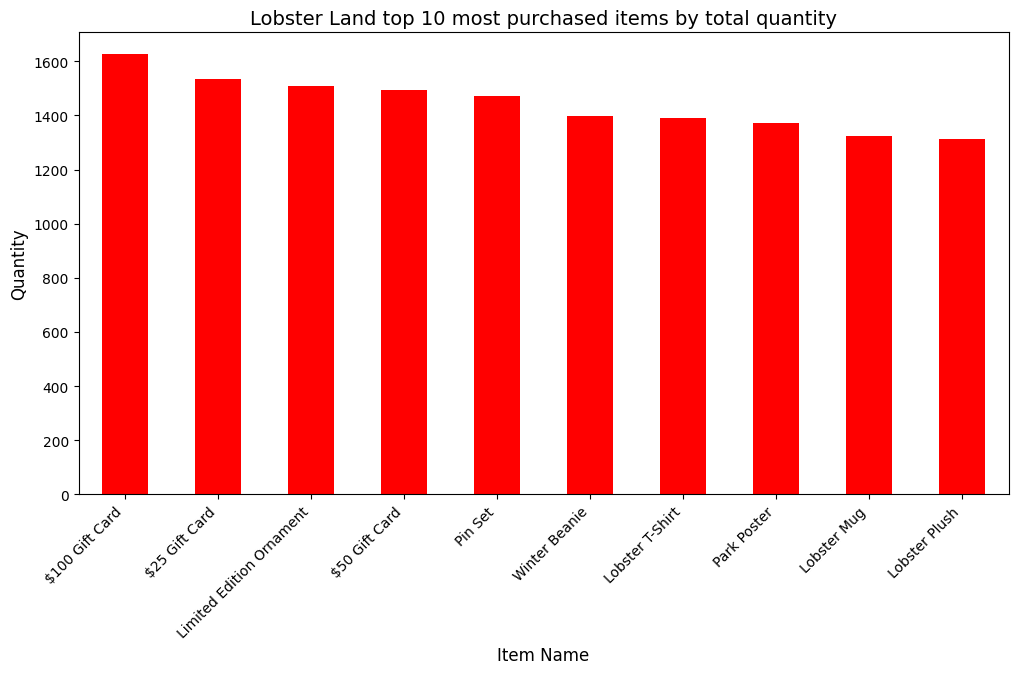

In [11]:
import matplotlib.pyplot as plt

top_items = holiday_sales.groupby('item_name')['quantity'].sum().nlargest(10)
plt.figure(figsize=(12,6))
top_items.plot(kind='bar', color='red')
plt.title("Lobster Land top 10 most purchased items by total quantity", fontsize=14)
plt.xlabel("Item Name", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.show()

12. Based on the total quantity of sold items, Lobsterland's highest-selling products are: Gift Cards worth 100 dollars and 25 dollars, as well as Limited Edition Ornaments. The lowest-selling ones appear to be Park Poster, Lobster Mug, and Lobster Plush. The main limitation here is that the graph only shows the total quantity sold but does not take into account total revenue, which means that some lower priced items may appear more frequently even though they contribute less to total sales.

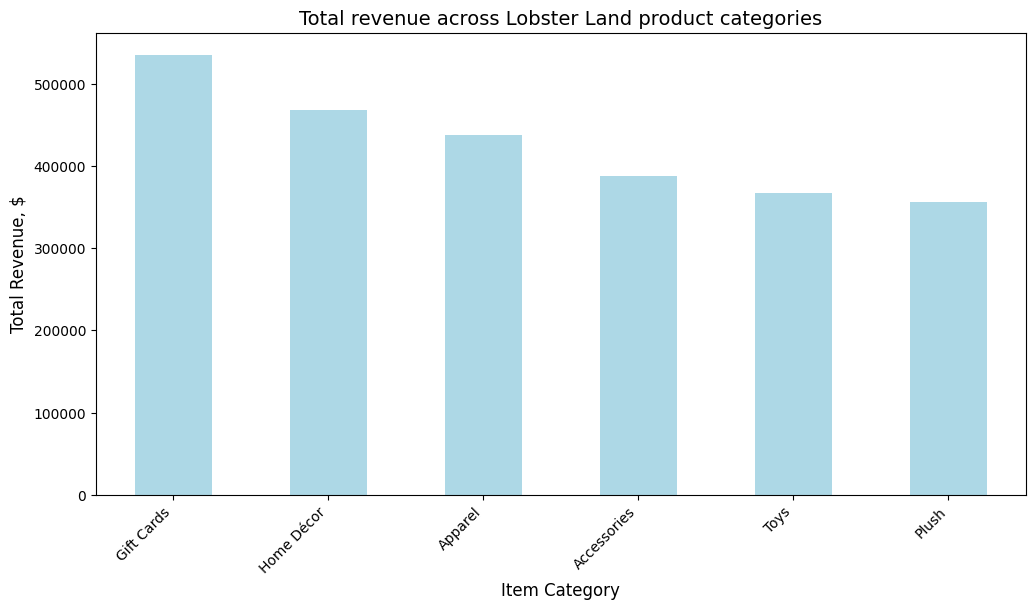

In [12]:
rev_category = holiday_sales.groupby('item_category')["total_price"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
rev_category.plot(kind='bar', color='lightblue')
plt.title("Total revenue across Lobster Land product categories", fontsize=14)
plt.xlabel("Item Category", fontsize=12)
plt.ylabel("Total Revenue, $", fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.show()

13. Gift cards generate the most revenue for Lobster Land among other categories. Accessories, Toys, and Plush bring significant revenue, but they underperform the other three, which may be due to few purchases or lower product prices.

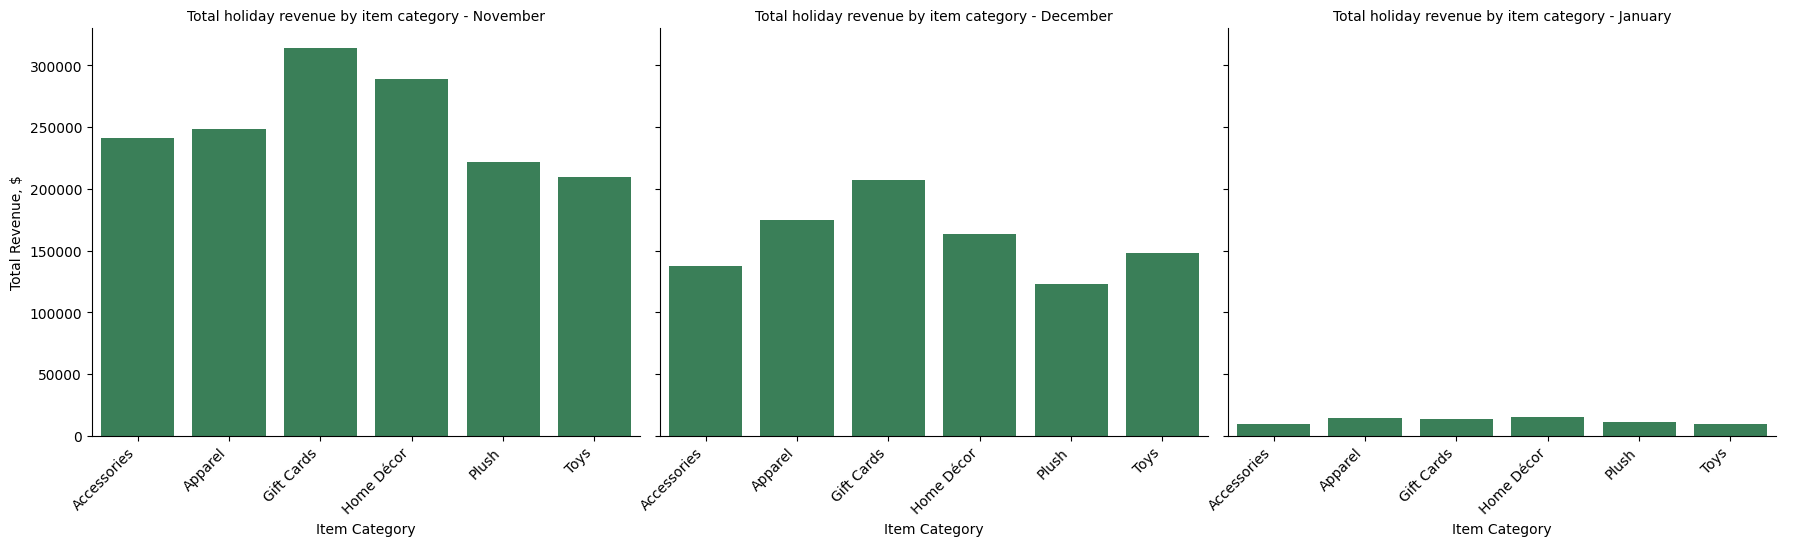

In [13]:
revenue_monthly = holiday_sales.groupby([holiday_sales['purchase_date'].dt.strftime('%B'), 'item_category'])['total_price'].sum().reset_index()
months = ['November','December','January']
g = sns.catplot(
    data = revenue_monthly,
    x = 'item_category',
    y = 'total_price',
    col = 'purchase_date',
    kind = 'bar',
    color = 'seagreen',
    col_order = months,
    height = 5,
    aspect = 1.2
)
g.set_axis_labels("Item Category", "Total Revenue, $")
g.set_titles("Total holiday revenue by item category - {col_name}")
g.set_xticklabels(rotation = 45, ha = 'right')

plt.show()

14. The analysis shows that sales slowly decline from November through December and then drop drastically in January. This can be explained by the holiday schedule in the US: Thanksgiving is celebrated at the end of November, followed by the Black Friday sale, and Christmas comes at the end of December. Many people prefer to buy gifts in advance, which explains the high sales in November 2024 and the subsequent downturn. Gift cards show the highest returns in both November and December, supporting the assumption of holiday sales trends. It is important to note that our data only covers the first 10 days of January sales, which means we cannot yet fully analyze trends for this month.

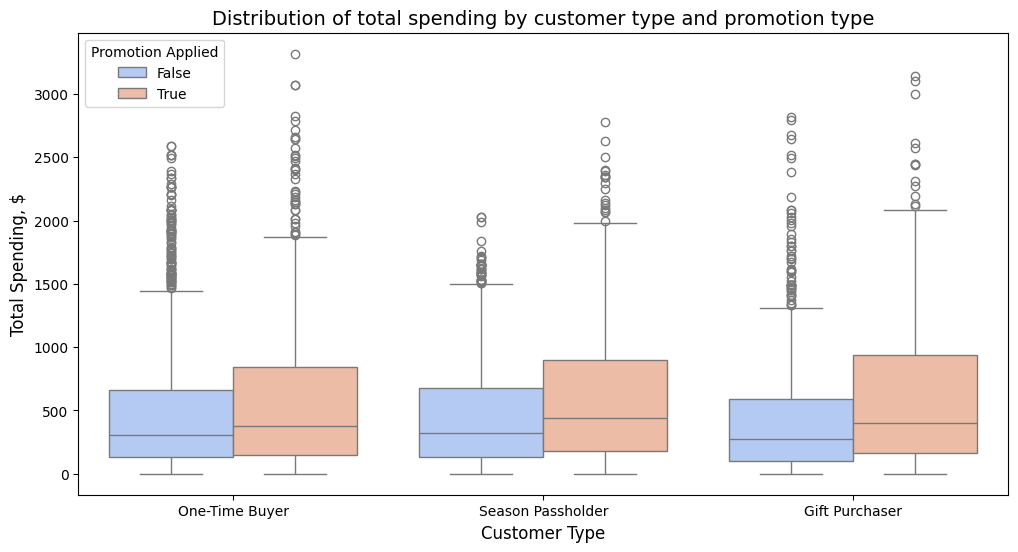

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=holiday_sales,
    x="customer_type",
    y="total_price",
    hue="promo_discount",
    palette="coolwarm"
    )

plt.title("Distribution of total spending by customer type and promotion type", fontsize=14)
plt.xlabel("Customer Type", fontsize=12)
plt.ylabel("Total Spending, $", fontsize=12)
plt.legend(title="Promotion Applied")

plt.show()

15. The graph shows that shoppers using promotions tend to have higher total spending, which indicates that discounts encourage larger purchases. Gift shoppers have the highest deviations in spending, which is likely due to high value (100) gift card purchases. Season pass holders have slightly higher median spending, possibly due to the fact that they make repeat purchases over time. Overall, spending varies widely among each group, illustrating different purchasing behaviors and patterns.

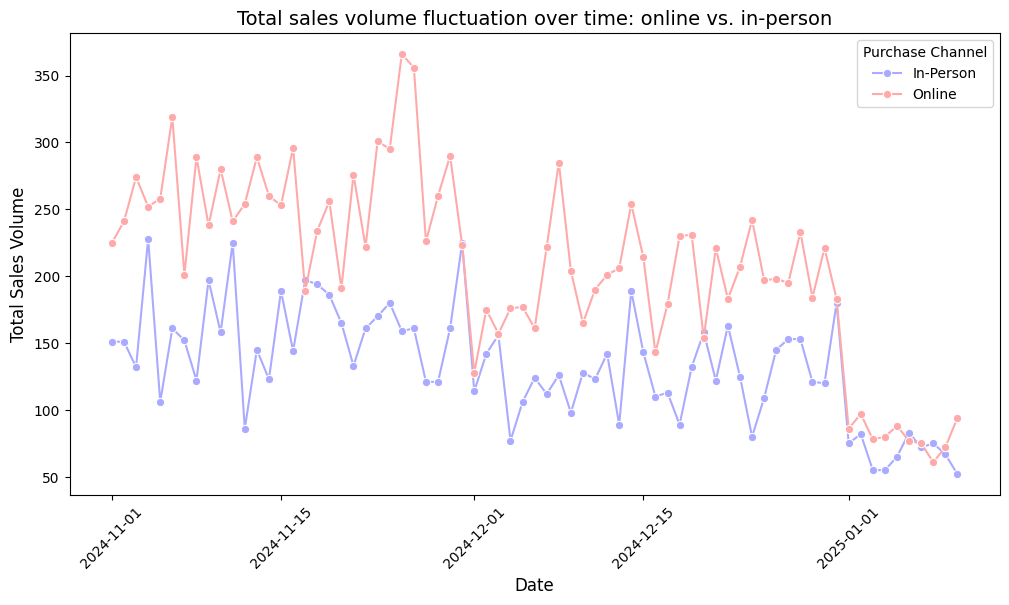

In [15]:
sales_volume = holiday_sales.groupby(['purchase_date', 'purchase_channel'])['quantity'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(
    data=sales_volume,
    x='purchase_date',
    y='quantity',
    hue='purchase_channel',
    marker='o',
    palette='bwr'
)
plt.title("Total sales volume fluctuation over time: online vs. in-person", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales Volume", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Purchase Channel")

plt.show()

16. We see that online sales consistently exceed in-person sales, with both channels having somewhat similar fluctuations. Sales peak in late November, likely due to Black Friday and holiday shopping, and then decline sharply in early January as the holiday season wraps up in December. The drop in online sales in mid-December can be attributed to delivery times, encouraging shoppers to make last-minute in-store purchases. Overall, the trends reflect seasonal shopping behavior: high holiday sales are followed by a post-holiday decline.

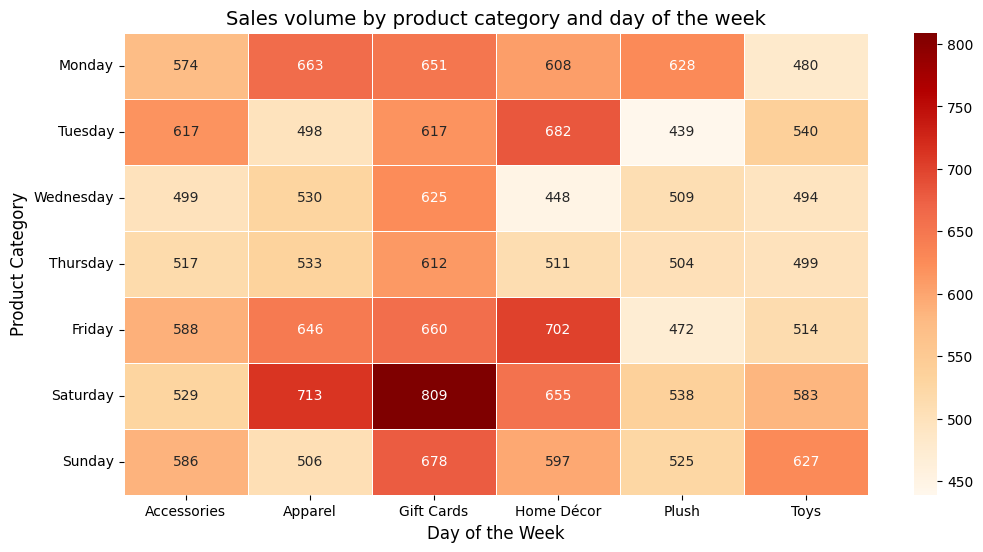

In [16]:
holiday_sales['day_of_week'] = holiday_sales['purchase_date'].dt.day_name()
sales_by_day = holiday_sales.groupby(['day_of_week', 'item_category'])['quantity'].sum().unstack()
order_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sales_by_day = sales_by_day.reindex(order_days)

plt.figure(figsize=(12, 6))
sns.heatmap(sales_by_day, cmap="OrRd", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Sales volume by product category and day of the week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Product Category", fontsize=12)

plt.show()

17. The highest sales of gift cards are seen on Saturdays, which makes sense since people often buy them as gifts for special occasions, which are often celebrated on weekends. On Fridays and Saturdays, high sales are seen in the apparel and home décor categories, which may be related to weekend home improvement projects. On weekdays, especially Tuesday through Thursday, sales are down in most categories due to customers being busy with work and weekenday chores.

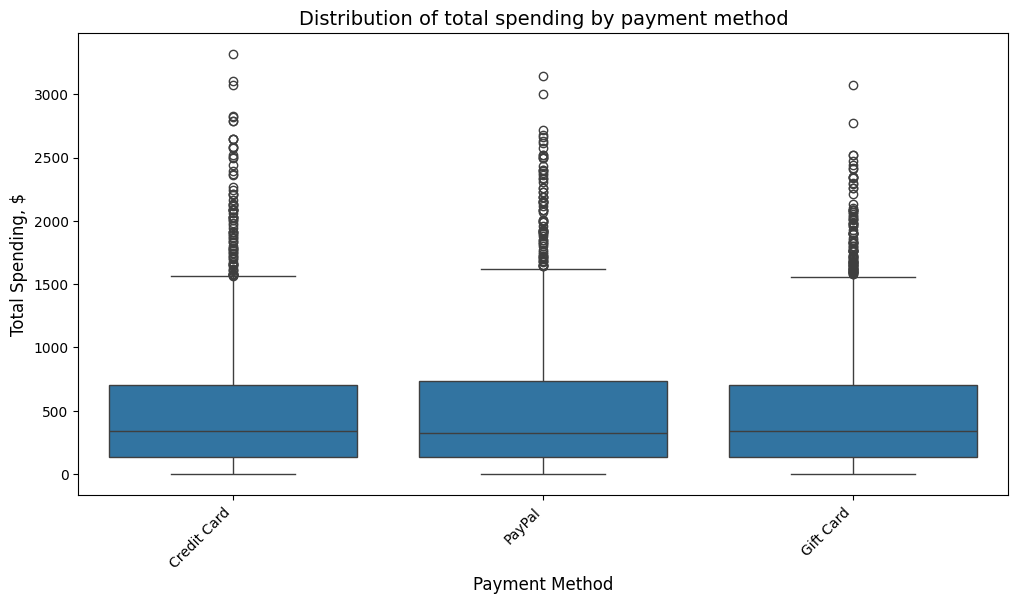

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=holiday_sales,
    x="payment_method",
    y="total_price",
)
plt.title("Distribution of total spending by payment method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Total Spending, $", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

18. The graph shows that total spending and median spending across all payment methods are very similar. However, there are many outliers in all payment types, which suggests that some customers make large purchases, most likely bulk orders or high-priced items. Most transactions fall within the lower range of spending, but the presence of outliers indicates occasional big purchases across all payment methods.

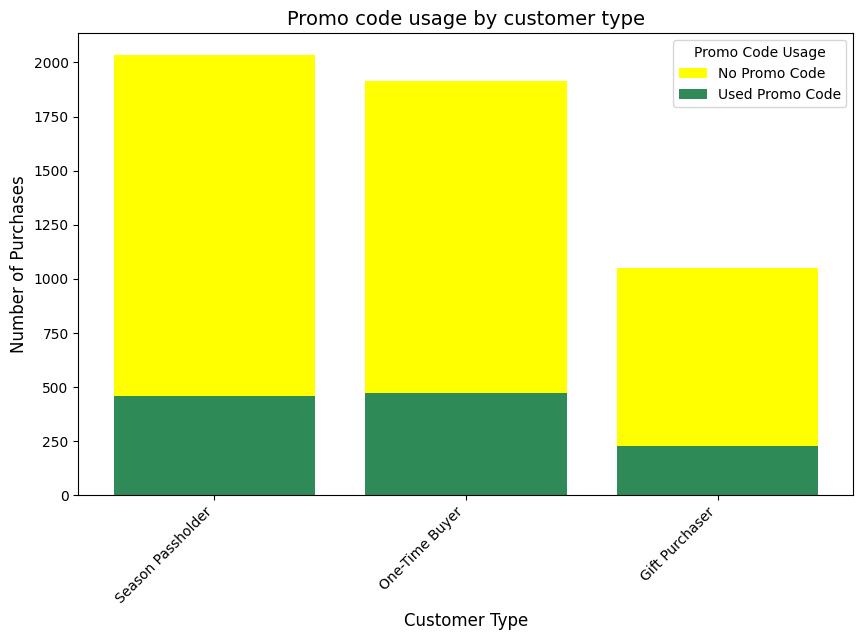

In [18]:
promo_usage = holiday_sales.groupby('customer_type')['promo_code'].count()
total_purchases = holiday_sales['customer_type'].value_counts()
promo_usage_percent = (promo_usage / total_purchases) * 100

plt.figure(figsize=(10,6))
plt.bar(total_purchases.index, total_purchases, label="No Promo Code", color='yellow')
plt.bar(promo_usage_percent.index, promo_usage, label="Used Promo Code", color='seagreen')
plt.title("Promo code usage by customer type", fontsize=14)
plt.xlabel("Customer Type", fontsize=12)
plt.ylabel("Number of Purchases", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Promo Code Usage")

plt.show()


19. We can see that season pass holders and one-time shoppers are the most likely to use promo codes, while gift shoppers are the least likely to use them. The first two groups respond well to promotions, suggesting that they are likely more aware of the deals due to marketing communications. Lobster Land has a potential to increase its client outreach by offering a discount for subscribing to the email newsletter and/or social media profiles. This procedure is quick, can be done both online and at the register, and it is cheap to implement.

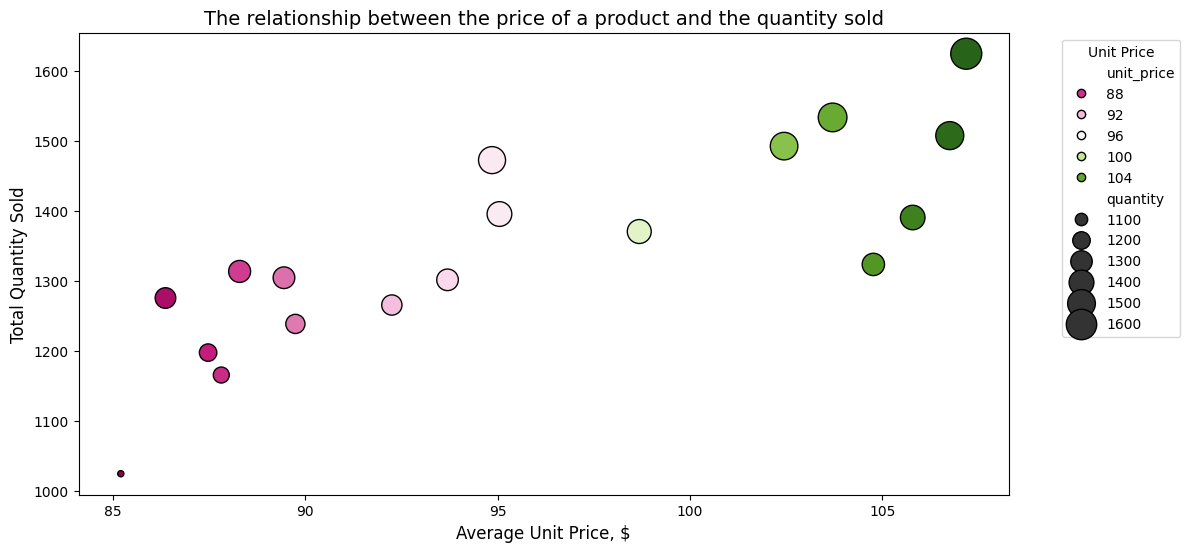

In [19]:
price_quantity = holiday_sales.groupby('item_name').agg({'quantity': 'sum', 'unit_price': 'mean'}).reset_index()

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=price_quantity,
    x='unit_price',
    y='quantity',
    size='quantity',
    hue='unit_price',
    sizes=(20, 500),
    palette='PiYG',
    edgecolor='black'
)
plt.title("The relationship between the price of a product and the quantity sold", fontsize=14)
plt.xlabel("Average Unit Price, $", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.legend(title="Unit Price", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

20. The graph shows that expensive items have been selling better than cheap ones. This can be explained by the popularity of high-value gift cards, especially during the holiday season. What is unusual is that the lowest priced items (88) sell worse than other items.